<a href="https://colab.research.google.com/github/DeividasRa/spotify_top_50_analysis/blob/main/PandasLearningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Spotify Top 50 Tracks 2020 Analysis

This project analyzes Spotify’s Top 50 Tracks from 2020 to uncover what makes a song popular.


## 1. Data Loading and Cleaning


In [3]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d atillacolak/top-50-spotify-tracks-2020
!unzip top-50-spotify-tracks-2020.zip #unziping


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/atillacolak/top-50-spotify-tracks-2020
License(s): CC0-1.0
  0% 0.00/4.40k [00:00<?, ?B/s]
100% 4.40k/4.40k [00:00<00:00, 17.1MB/s]
Archive:  top-50-spotify-tracks-2020.zip
  inflating: spotifytoptracks.csv    


## 2. Data Cleaning

In [4]:
import pandas as pd
df = pd.read_csv("spotifytoptracks.csv")

#getting rid of 0 column(no point to have it)
df = df.drop(columns=['Unnamed: 0'])

#making categories for the better performance and understanding
for col in df.columns:
    if df[col].dtype in ['object', 'int64'] and df[col].nunique() < 20:
        df[col] = df[col].astype('category')
df.head()


,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


In [ ]:
#check the types
df.dtypes

In [ ]:
#missing values
df.isna().sum()


In [ ]:
#dyblicates
df.duplicated().sum()


In [ ]:
#Outliers
for col in df.select_dtypes(include=['float64', 'int64']).columns:

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

In [ ]:
# instrumentalness data is real, but its worth to check for unbalance
q1 = df['instrumentalness'].quantile(0.25)
q3 = df['instrumentalness'].quantile(0.75)

iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# filters the instrumentalness outliers only
outliers = df[(df['instrumentalness'] < lower) | (df['instrumentalness'] > upper)]
outliers


## 3. Dataset Overview

In [ ]:
#how many rows do we have in data(observations)
len(df)

50

In [ ]:
#how many columns in data(features)
df.shape[1]

16

In [ ]:
# first number would be rows and second columns
df.shape


(50, 16)

In [ ]:
#types of data
df.dtypes

In [5]:
#types by category
df.select_dtypes(include=["object", "category"])

,artist,album,track_name,track_id,key,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,1,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,6,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,10,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,8,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,11,Nu-disco
5,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,11,Hip-Hop/Rap
6,Harry Styles,Fine Line,Watermelon Sugar,6UelLqGlWMcVH1E5c4H7lY,0,Pop
7,Powfu,death bed (coffee for your head),death bed (coffee for your head),7eJMfftS33KTjuF7lTsMCx,8,Hip-Hop/Rap
8,Trevor Daniel,Nicotine,Falling,2rRJrJEo19S2J82BDsQ3F7,10,R&B/Hip-Hop alternative
9,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,Someone You Loved,7qEHsqek33rTcFNT9PFqLf,1,Alternative/Indie


In [ ]:
#types by numeric
df.select_dtypes(include=["int64", "float64"])

## 4. Artist and Album Insights

In [ ]:
#How many times same artist apears in the list
#df["artist"].value_counts()

#Who apears more than 1
df["artist"].value_counts()[df["artist"].value_counts() > 1]

,count
artist,
Dua Lipa,3
Billie Eilish,3
Travis Scott,3
Harry Styles,2
Lewis Capaldi,2
Justin Bieber,2
Post Malone,2


In [ ]:
#Most popular artist/s
vc = df["artist"].value_counts()
vc[vc == vc.max()]

,count
artist,
Dua Lipa,3
Billie Eilish,3
Travis Scott,3


#Diging deeper to check why those songs are so popular

In [ ]:
# Find most frequent artists with more than 1 track
popular_artists = df["artist"].value_counts()
top_artists = popular_artists[popular_artists > 1].index.tolist()

# Filter songs by these artists
top_artist_tracks = df[df["artist"].isin(top_artists)]

# Show all available data (track name, genre, etc.)
top_artist_tracks.sort_values(by=["artist", "track_name"])



Select only the meaningful musical features

In [17]:
# Find most frequent artists with more than 1 track
popular_artists = df["artist"].value_counts()
top_artists = popular_artists[popular_artists > 1].index.tolist()

# Filter songs by these artists
top_artist_tracks = df[df["artist"].isin(top_artists)]

# Select only the meaningful musical features
top_artist_features = top_artist_tracks[[
    "artist", "track_name", "genre",  # for context
    "danceability", "energy", "tempo", "loudness"
]]

# Optional: sort nicely
top_artist_features = top_artist_features.sort_values(by=["artist", "track_name"])

# Display result
top_artist_features


,artist,track_name,genre,danceability,energy,tempo,loudness
26,Billie Eilish,bad guy,Electro-pop,0.701,0.425,135.128,-10.965
24,Billie Eilish,everything i wanted,Pop,0.704,0.225,120.006,-14.454
44,Billie Eilish,lovely (with Khalid),Chamber pop,0.351,0.296,115.284,-10.109
31,Dua Lipa,Break My Heart,Dance-pop/Disco,0.730,0.729,113.013,-3.434
4,Dua Lipa,Don't Start Now,Nu-disco,0.793,0.793,123.950,-4.521
48,Dua Lipa,Physical,Dance/Electronic,0.647,0.844,146.967,-3.756
21,Harry Styles,Adore You,Pop,0.676,0.771,99.048,-3.675
6,Harry Styles,Watermelon Sugar,Pop,0.548,0.816,95.390,-4.209
14,Justin Bieber,Intentions (feat. Quavo),Pop,0.806,0.546,147.986,-6.637
30,Justin Bieber,Yummy,Pop,0.676,0.506,145.842,-6.652


    **The most frequent artists tend to produce tracks with:**

        High danceability (mostly above 0.65)

        Moderate to high energy levels

        Tempo between 100–150 BPM

        Loudness levels around -3.5 to -6.5 dB

These traits suggest that hit songs often balance energy, rhythm, and accessibility — aligning closely with pop or pop-influenced genres.

In [6]:
#Unaique
df["artist"].nunique()


#list(df["artist"].unique())
#sorted(df["artist"].unique())

40

In [7]:
#Albums with >1 song
df["album"].value_counts()[df["album"].value_counts() >1]

,count
album,
Future Nostalgia,3
Hollywood's Bleeding,2
Fine Line,2
Changes,2


In [ ]:
#How many albums unique
df["album"].nunique()

45

## 5. Feature Filtering

In [ ]:
#Tracks with high danceability > 0.7
df[df["danceability"] > 0.7]

#If want to see the list of tracks
#df[df["danceability"] > 0.7][["track_name", "danceability"]]


In [ ]:
#Tracks with low danceability < 0.4
df[df["danceability"] < 0.4]

#If want to see the list of tracks
#df[df["danceability"] < 0.4][["track_name", "danceability"]]


In [ ]:
#List with loudness < -5
df[df["loudness"] < -5]

#If want to see the list of tracks
#df[df["loudness"] < -5][["track_name", "danceability"]]


In [ ]:
#Longests songs data in column
df.loc[df["duration_ms"].idxmax()]

#Longests songs data in row
#df.loc[[df["duration_ms"].idxmax()]]

In [ ]:
#Shortests songs data in column
df.loc[df["duration_ms"].idxmin()]

#Shortests songs data in row
#df.loc[[df["duration_ms"].idxmin()]]

## 6. Genre Distribution

In [ ]:
#Most popular genre
df["genre"].value_counts().head(1)

#If we have more than 1
#vc = df["genre"].value_counts()
#vc[vc == vc.max()]


,count
genre,
Pop,14


In [ ]:
df["genre"].value_counts()

In [ ]:
#Genres have just one song
df["genre"].value_counts()[df["genre"].value_counts() == 1]

In [ ]:
#How many unique genre in the list
df["genre"].nunique()


#list(df["genre"].unique())
#sorted(df["genre"].unique())

16

## 7. Correlation Analysis

In [ ]:
#Correlation
df.select_dtypes(include=["float64", "int64"]).corr()



,energy,danceability,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
energy,1.000000,0.152552,0.791640,-0.682479,0.074267,-0.385515,0.069487,0.393453,0.075191,0.081971
danceability,0.152552,1.000000,0.167147,-0.359135,0.226148,-0.017706,-0.006648,0.479953,0.168956,-0.033763
loudness,0.791640,0.167147,1.000000,-0.498695,-0.021693,-0.553735,-0.069939,0.406772,0.102097,0.064130
acousticness,-0.682479,-0.359135,-0.498695,1.000000,-0.135392,0.352184,-0.128384,-0.243192,-0.241119,-0.010988
speechiness,0.074267,0.226148,-0.021693,-0.135392,1.000000,0.028948,-0.142957,0.053867,0.215504,0.366976
instrumentalness,-0.385515,-0.017706,-0.553735,0.352184,0.028948,1.000000,-0.087034,-0.203283,0.018853,0.184709
liveness,0.069487,-0.006648,-0.069939,-0.128384,-0.142957,-0.087034,1.000000,-0.033366,0.025457,-0.090188
valence,0.393453,0.479953,0.406772,-0.243192,0.053867,-0.203283,-0.033366,1.000000,0.045089,-0.039794
tempo,0.075191,0.168956,0.102097,-0.241119,0.215504,0.018853,0.025457,0.045089,1.000000,0.130328
duration_ms,0.081971,-0.033763,0.064130,-0.010988,0.366976,0.184709,-0.090188,-0.039794,0.130328,1.000000


In [ ]:
#Strong correlation list
corr = df.select_dtypes(include=["float64", "int64"]).corr()
corr[corr > 0.7]


,energy,danceability,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
energy,1.00000,NaN,0.79164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loudness,0.79164,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
speechiness,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
liveness,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
valence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
tempo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
duration_ms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


The only strongly positive correlation above 0.7 is between energy and loudness.
These two features are closely related and could be useful for classifying more active or high-energy tracks

In [ ]:
#Negative correlation list
corr = df.select_dtypes(include=["float64", "int64"]).corr()
corr[corr < -0.5]


,energy,danceability,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
energy,NaN,NaN,NaN,-0.682479,NaN,NaN,NaN,NaN,NaN,NaN
danceability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loudness,NaN,NaN,NaN,NaN,NaN,-0.553735,NaN,NaN,NaN,NaN
acousticness,-0.682479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speechiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,-0.553735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
liveness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
valence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tempo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_ms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The strongest negative correlations are:
Between energy and acousticness (-0.68): more acoustic songs tend to be less energetic.
Between loudness and instrumentalness (-0.55): instrumental tracks tend to be quieter.

In [ ]:
#Weak correlation list
corr = df.select_dtypes(include=["float64", "int64"]).corr()
corr[(corr > -0.1) & (corr < 0.1)]


,energy,danceability,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
energy,NaN,NaN,NaN,NaN,0.074267,NaN,0.069487,NaN,0.075191,0.081971
danceability,NaN,NaN,NaN,NaN,NaN,-0.017706,-0.006648,NaN,NaN,-0.033763
loudness,NaN,NaN,NaN,NaN,-0.021693,NaN,-0.069939,NaN,NaN,0.064130
acousticness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010988
speechiness,0.074267,NaN,-0.021693,NaN,NaN,0.028948,NaN,0.053867,NaN,NaN
instrumentalness,NaN,-0.017706,NaN,NaN,0.028948,NaN,-0.087034,NaN,0.018853,NaN
liveness,0.069487,-0.006648,-0.069939,NaN,NaN,-0.087034,NaN,-0.033366,0.025457,-0.090188
valence,NaN,NaN,NaN,NaN,0.053867,NaN,-0.033366,NaN,0.045089,-0.039794
tempo,0.075191,NaN,NaN,NaN,NaN,0.018853,0.025457,0.045089,NaN,NaN
duration_ms,0.081971,-0.033763,0.064130,-0.010988,NaN,NaN,-0.090188,-0.039794,NaN,NaN


Features with correlations close to zero show no meaningful relationship.
For example, loudness and speechiness (-0.02) or energy and liveness (0.07) are essentially unrelated.

## 8. Genre-Based Comparisons

In [ ]:
#How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
#Taking 4 genres needed
genres = ["Pop", "Hip-Hop/Rap", "Dance/Electronic", "Alternative/Indie"]
filter_df = df[df["genre"].isin(genres)].copy()#This copy is for safety, because Im removing not from DF bet just here

#Removing other genre
filter_df["genre"] = filter_df["genre"].cat.remove_unused_categories()

# Grouping by genre and calculating the average danceability
danceability_by_genre = filter_df.groupby("genre")["danceability"].mean()

danceability_by_genre.name = "avg_danceability"
danceability_by_genre = danceability_by_genre.reset_index()

print(danceability_by_genre.to_string(index=False))


            genre  avg_danceability
Alternative/Indie          0.661750
 Dance/Electronic          0.755000
      Hip-Hop/Rap          0.765538
              Pop          0.677571


<ipython-input-7-57bed7e0d5cf>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  danceability_by_genre = filter_df.groupby("genre")["danceability"].mean()


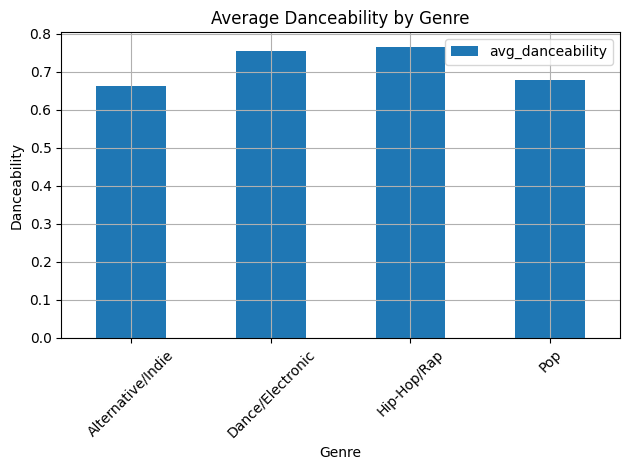

In [ ]:
import matplotlib.pyplot as plt

danceability_by_genre.set_index("genre").plot(kind="bar")


plt.title("Average Danceability by Genre")
plt.xlabel("Genre")
plt.ylabel("Danceability")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


The highest average danceability scores are found in the Hip-Hop/Rap and Dance/Electronic genres, indicating that these are the most danceable.
Pop and Alternative/Indie tracks are slightly less danceable but still rhythm-oriented.

In [ ]:
#How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
#Taking 4 genres needed
genres = ["Pop", "Hip-Hop/Rap", "Dance/Electronic", "Alternative/Indie"]
filter_df = df[df["genre"].isin(genres)].copy()#This copy is for safety, because Im removing not from DF bet just here

#Removing other genre
filter_df["genre"] = filter_df["genre"].cat.remove_unused_categories()

# Grouping by genre and calculating the average loudness
loudness_by_genre = filter_df.groupby("genre")["loudness"].mean()

loudness_by_genre.name = "avg_loudness"
loudness_by_genre = loudness_by_genre.reset_index()

print(loudness_by_genre)

               genre  avg_loudness
0  Alternative/Indie     -5.421000
1   Dance/Electronic     -5.338000
2        Hip-Hop/Rap     -6.917846
3                Pop     -6.460357


<ipython-input-28-83aee70a7e30>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loudness_by_genre = filter_df.groupby("genre")["loudness"].mean()


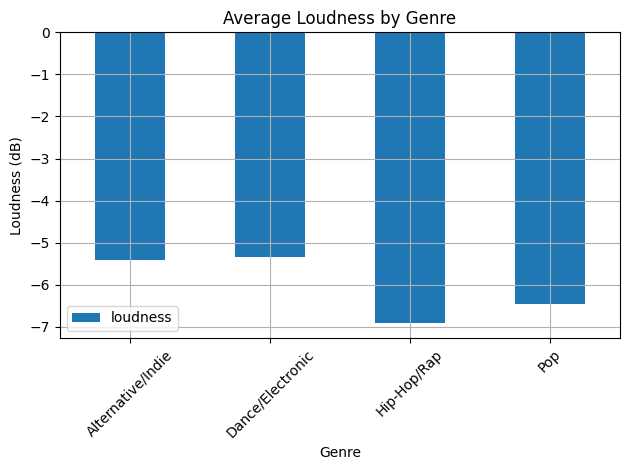

In [ ]:
import matplotlib.pyplot as plt

loudness_by_genre = loudness_by_genre.reset_index()
loudness_by_genre.set_index("genre").plot(kind="bar")


plt.title("Average Loudness by Genre")
plt.xlabel("Genre")
plt.ylabel("Loudness (dB)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Dance/Electronic and Alternative/Indie genres have the highest (least negative) loudness values, meaning they are the loudest.
Hip-Hop/Rap and Pop tracks tend to be quieter in comparison.

In [ ]:
#How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
#Taking 4 genres needed
genres = ["Pop", "Hip-Hop/Rap", "Dance/Electronic", "Alternative/Indie"]
filter_df = df[df["genre"].isin(genres)].copy()#This copy is for safety, because Im removing not from DF bet just here

#Removing other genre
filter_df["genre"] = filter_df["genre"].cat.remove_unused_categories()

# Grouping by genre and calculating the average acousticness
acousticness_by_genre = filter_df.groupby("genre")["acousticness"].mean()

acousticness_by_genre.name = "avg_acousticness"
acousticness_by_genre = acousticness_by_genre.reset_index()

print(acousticness_by_genre)

               genre  avg_acousticness
0  Alternative/Indie          0.583500
1   Dance/Electronic          0.099440
2        Hip-Hop/Rap          0.188741
3                Pop          0.323843


<ipython-input-17-09690448ee2b>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acousticness_by_genre = filter_df.groupby("genre")["acousticness"].mean()


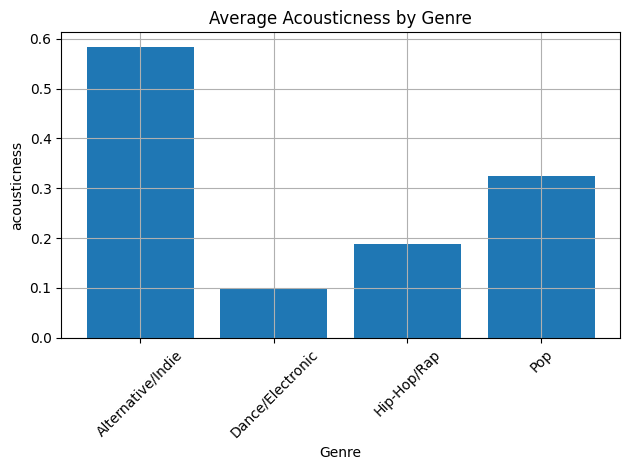

In [ ]:
import matplotlib.pyplot as plt

plt.bar(acousticness_by_genre["genre"], acousticness_by_genre["avg_acousticness"])



plt.title("Average Acousticness by Genre")
plt.xlabel("Genre")
plt.ylabel("Acousticness")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


The Alternative/Indie genre shows the highest average acousticness, indicating more natural or acoustic sound characteristics. Dance/Electronic has the lowest acousticness, suggesting more synthetic and digitally produced tracks.

9. Key Insights and Conclusions
    What we tried to achieve:

This analysis aimed to explore Spotify's Top 50 Tracks of 2020 and understand which musical and categorical features contribute to song popularity.
We examined genres, artists, audio features, and correlations to uncover patterns that define a "hit" song.
    What we found:

    Hip-Hop/Rap and Dance/Electronic are the most danceable genres, with average danceability > 0.75.

    Dance/Electronic and Alternative/Indie genres have the highest loudness (around -5.3 dB), while Hip-Hop/Rap is quieter.

    Alternative/Indie shows the highest acousticness (0.58), contrasting with the highly synthetic Dance/Electronic tracks.

    Energy and Loudness are strongly correlated (corr = 0.79), while Acousticness is negatively correlated with both.

    Songs from the most frequent artists (e.g. Billie Eilish, Dua Lipa, Travis Scott) tend to share common traits:

        Danceability above 0.65

        Energy above 0.6

        Tempo between 100–150 BPM

        Loudness around -4 to -6 dB

These patterns suggest that songs with balanced rhythm, energy, and accessibility are more likely to succeed.
    Additional Insight:

Although Alternative/Indie tracks have high acousticness (0.5835), they are still mastered loudly (avg loudness = -5.42 dB).
This suggests that even “softer” genres are optimized for loudness, likely due to commercial streaming standards (the loudness war).
🔧 How the analysis can be improved:

    Include more data (Top 200 instead of 50) to increase representativeness.

    Analyze listener behavior (skips, likes, repeat rate) if such data were available.

    Use clustering or machine learning to group tracks by hidden patterns.

    Compare across years to see how hit song characteristics evolve over time.

